# ANALYSIS FOR MICROSOFT'S NEW MOVIE STUDIO

### Overview
The main objective of this chapter is to provide an overview of the current state of research on the topic. 
Microsoft is taking a giant leap into the entertainment industry with a new movie studio. But before it does, they need strategic insights for a successful venture. I have been tasked to leverage data insights to guide their new venture. This project will strongly be aided by  performing exploratory data analysis and the focus will be understanding the performance dynamics of movie genres, release dates and budgets in order to derive actionable recommendations for the strategic planning of Microsoft's new movie studio. 

To achieve this, my analysis will follow this structured approach:
1. Data Collection where I will compile the relevant datasets from different data sources that include the movie genres, dates of release and budgets.
2. Exploratory Data Analysis (EDA) to identify general patterns in the data.
3. Recommendations based on the data insights to help derive meaningful strategies befor Microsft opens its new venture.

### Business Understanding for Microsoft's new movie studio
Since Microsoft is new to the industry, I have identified the key problems that need to be addressed so that the new business venture can be a success.

This analysis will be based on the following factors:
1. Which genres peform well in the film industry? Perform analysis to determine which genres are profitable and have a high demand. This will help Microsoft to focus on the right genre to invest in.
2. Is there a correlation between a film budget and the revenue? Analyse thr relationship between  the budget and revenue of a film to determine if investing in high budget films is profitable. This will help Microsoft to determine the budget for their films.
3. What are the trends? Is there any particular time of the year that is more profitable for film release? Identify profitable film release windows by analysing historical release dates.



## Data Understanding
The data I am going to use for this analysis are from the following sources:
1. bom.movie_gross.csv.gz, box office mojo that has the gross earnings of the movies.
2. tmdb.movies.csv.gz that contain data about the release dates of the movies.
3. rt.movie_info.tsv.gz that contain the genre of the movies.
4. tn movies that has information about gross earnings.


### Data Preparation
In this part, I prepared my data by importing and viewing the datasets. I handled cleaning of the data so as to make it more reliable and accurate.
The steps I used to clean the data are Data Collection and Initial Review where i gathered the data from various sources such as spreadsheets and the carried out initial assessment to understand the structure of the data and notice any inconsistensies. I then Handled Missing Data that could skew the analysis if left in the data,  I Removed any Duplicates to avaoid repitition of the data and lastly Correcting Inconsistencies and Standardizing Data such as standardizing column names and dates.


In [40]:
#imporring the libraries
import numpy as np
import pandas as pd

#### Working on bom.movie_gross.csv.gz file
Processing bom.movie_gross.csv.gz file where i loaded the data and viewed the rows to get an understanding of the data. There were some missing data so i resulted to dropping them since they do not play a signifacant role in my analysis objectives. I proceeded to change the columns with money amounts to numerical data for easy analysis and computation of the data.

In [41]:
#importing the bom dataset
bom_movies = pd.read_csv(r"C:\Users\hp\Documents\phase-1-project\zippedData\zippedData\bom.movie_gross.csv.gz")

#viewing the rows of the dataset
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [42]:
#checking for missing values
bom_movies.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [43]:
#dropping any duplicate values
bom_movies = bom_movies.drop_duplicates()

#dropping columns with missing values
bom_movies = bom_movies.dropna()

#Converting columns to numerical data
cols_to_convert = ['foreign_gross', 'domestic_gross']
for col in cols_to_convert:
    bom_movies[col] = bom_movies[col] = bom_movies[col].astype(str).str.replace('[$,]', '', regex=True).astype(float)
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [44]:
#verifying and validating the data
bom_movies.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### Working on the rt.movie_info.tsv.gz

In [45]:
#accessing the file
rt_movies = pd.read_csv(r"zippedData/zippedData/rt.movie_info.tsv.gz", sep='\t')

#viewing the dataset
rt_movies

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [46]:
#checking for any missing values
rt_movies.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [47]:
# Dropping columns that are not significant for this analysis
columns_to_drop = ['box_office', 'studio', 'currency', 'id', 'theater_date', 'dvd_date']
rt_movies = rt_movies.drop(columns=columns_to_drop)

# Dropping any duplicates in the dataset
rt_movies = rt_movies.drop_duplicates()

# Dropping all rows with missing values
rt_movies = rt_movies.dropna()

In [48]:
rt_movies

,synopsis,rating,genre,director,writer,runtime
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,104 minutes
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,108 minutes
2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,116 minutes
3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,128 minutes
5,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,95 minutes
...,...,...,...,...,...,...
1550,A hard-working Sicilian heads for Switzerland ...,R,Art House and International|Comedy|Drama,Franco Brusati,Nino Manfredi|Franco Brusati|Iaia Fiastri,112 minutes
1551,Popular rap group Run DMC stars as a trio of p...,R,Action and Adventure|Drama,Rick Rubin,Rick Rubin|Ric Menello,92 minutes
1552,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,116 minutes
1556,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,88 minutes


#### Working on tmdb.movies.csv
I loaded the dataset and viewed the columns in the data. In the cleaning process, i identified the significant columns and dropped the rest.

In [49]:
#loading the dataset
tmdb = pd.read_csv(r"C:\Users\hp\Documents\phase-1-project\zippedData\zippedData\tmdb.movies.csv.gz")

#viewing the file
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [50]:
#checking for any missing values
tmdb.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [51]:
#dropping unnessesary columns
cols_to_drop = ['vote_count', 'genre_ids', 'vote_average', 'Unnamed: 0']
tmdb = tmdb.drop(columns=cols_to_drop)

In [52]:
tmdb

,id,original_language,original_title,popularity,release_date,title
0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon
2,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2
3,862,en,Toy Story,28.005,1995-11-22,Toy Story
4,27205,en,Inception,27.920,2010-07-16,Inception
...,...,...,...,...,...,...
26512,488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions
26513,485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_
26514,381231,en,The Last One,0.600,2018-10-01,The Last One
26515,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made


#### Working on tn.movie_budgets.csv.gz
Processing tn.movie_budgets.csv.gz where i imported the file and checked for any missing values and duplicates.
There were no missing values and no duplicates in the dataset. I proceeded to standardize the columns and transform dates to datetime data

In [53]:
#loading the data
tn_budgets = pd.read_csv(r"C:\Users\hp\Documents\phase-1-project\zippedData\zippedData\tn.movie_budgets.csv.gz")

#viewing the data
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [54]:
#checking for any missing data
tn_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [55]:
#removing any duplicates from the tn movies dataset
tn_budgets = tn_budgets.drop_duplicates()

In [56]:
#converting release_date to datetime
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])

#renaming the movie column to title
tn_budgets = tn_budgets.rename(columns={'movie': 'title'})

#Converting columns to numerical data
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_convert:
    tn_budgets[col] = tn_budgets[col].astype(str).str.replace('[$,]', '', regex=True).astype(float)

tn_budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


### Merging the datasets

In [57]:
#merging the bom_movies and tmdb dataset based on the movie titles
merged_movies = pd.merge(bom_movies, tmdb, left_on='title', right_on='title', how='inner')

#viewing the merged dataset
merged_movies

,title,studio,domestic_gross,foreign_gross,year,id,original_language,original_title,popularity,release_date
0,Toy Story 3,BV,415000000.0,652000000.0,2010,10193,en,Toy Story 3,24.445,2010-06-17
1,Inception,WB,292600000.0,535700000.0,2010,27205,en,Inception,27.920,2010-07-16
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,10192,en,Shrek Forever After,15.041,2010-05-16
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,10138,en,Iron Man 2,28.515,2010-05-07
...,...,...,...,...,...,...,...,...,...,...
1696,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02
1697,I Still See You,LGF,1400.0,1500000.0,2018,448095,en,I Still See You,12.867,2018-10-12
1698,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,467952,en,The Catcher Was a Spy,9.727,2018-06-22
1699,Time Freak,Grindstone,10000.0,256000.0,2018,92968,en,Time Freak,1.604,2011-02-10


In [58]:
#merging the previously merged dataset (tmdb and bom_movies) with tn_budgets
merged_movies = pd.merge(merged_movies, tn_budgets, left_on='title', right_on='title', how='inner')

#viewing the merged dataset
merged_movies

,title,studio,domestic_gross_x,foreign_gross,year,id_x,original_language,original_title,popularity,release_date_x,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,10193,en,Toy Story 3,24.445,2010-06-17,47,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,27205,en,Inception,27.920,2010-07-16,38,2010-07-16,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,10192,en,Shrek Forever After,15.041,2010-05-16,27,2010-05-21,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,53,2010-06-30,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,10138,en,Iron Man 2,28.515,2010-05-07,15,2010-05-07,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Hotel Artemis,Global Road,6700000.0,6000000.0,2018,406761,en,Hotel Artemis,14.585,2018-06-08,15,2018-06-08,15000000.0,6708137.0,1.275880e+07
1193,Kin,LGF,5700000.0,4300000.0,2018,425505,en,Kin,23.805,2018-08-31,88,2018-08-31,30000000.0,5718096.0,1.009682e+07
1194,Suspiria,Amazon,2500000.0,5400000.0,2018,361292,en,Suspiria,16.925,2018-10-26,81,2018-10-26,20000000.0,2483472.0,7.034615e+06
1195,Destroyer,Annapurna,1500000.0,4000000.0,2018,471507,en,Destroyer,17.815,2018-12-25,5,2018-12-25,9000000.0,1533324.0,3.681096e+06


In [59]:
#checking for any missing values
merged_movies.isnull().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id_x                 0
original_language    0
original_title       0
popularity           0
release_date_x       0
id_y                 0
release_date_y       0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
dtype: int64

In [60]:
#dropping identical columns
merged_movies = merged_movies.drop('release_date_x', axis=1)
merged_movies

,title,studio,domestic_gross_x,foreign_gross,year,id_x,original_language,original_title,popularity,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,10193,en,Toy Story 3,24.445,47,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,27205,en,Inception,27.920,38,2010-07-16,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,10192,en,Shrek Forever After,15.041,27,2010-05-21,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,24021,en,The Twilight Saga: Eclipse,20.340,53,2010-06-30,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,10138,en,Iron Man 2,28.515,15,2010-05-07,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Hotel Artemis,Global Road,6700000.0,6000000.0,2018,406761,en,Hotel Artemis,14.585,15,2018-06-08,15000000.0,6708137.0,1.275880e+07
1193,Kin,LGF,5700000.0,4300000.0,2018,425505,en,Kin,23.805,88,2018-08-31,30000000.0,5718096.0,1.009682e+07
1194,Suspiria,Amazon,2500000.0,5400000.0,2018,361292,en,Suspiria,16.925,81,2018-10-26,20000000.0,2483472.0,7.034615e+06
1195,Destroyer,Annapurna,1500000.0,4000000.0,2018,471507,en,Destroyer,17.815,5,2018-12-25,9000000.0,1533324.0,3.681096e+06


### Data Analysis
The data were analyzed using descriptive statistics, including means, standard deviations, and frequencies. In this data analysis, I revealed what genres are currently dominating the box office and this will allow microsoft to produce films with higher demand.
I also used the data to find out the seasonality and trends in the movie industry inorder to find the perfect release dates for their films. I am also going to analyze the revenue in relation to the production budgets inorder to optimize budgets and have a good return on investment.

In [61]:
#importing the libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#### Genre Analysis
For this analysis, I used the rtmovie data to find the popular genres of the movies.
I started by finding the most popular genres and the number of times they appear in the rt movie dataset. In this case I only used the top 8 genres from the data

In [62]:
#finding the most popular genres and the frequency 
frequency = rt_movies['genre'].value_counts()

#viewing the first 8 popular genres
popular_genres = frequency.head(8)

print(popular_genres)

genre
Drama                                              112
Comedy                                              83
Comedy|Drama                                        64
Drama|Mystery and Suspense                          49
Art House and International|Drama                   31
Drama|Romance                                       27
Action and Adventure|Drama                          25
Action and Adventure|Drama|Mystery and Suspense     24
Name: count, dtype: int64


I created a dictionary containing the genre and the frequencies and plotted a horizontal bar graph to show the distributions of the genres.

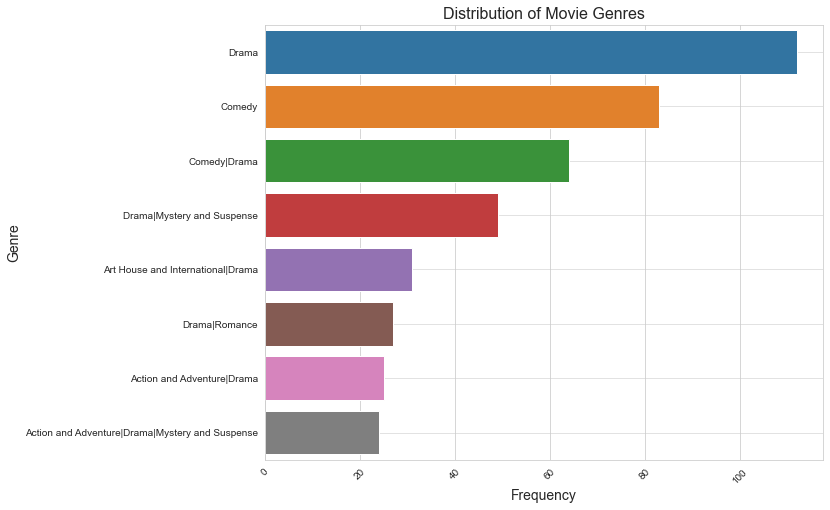

In [63]:
# Creating a dictionary with genre counts
frequency = {
  "Drama": 112,
  "Comedy": 83,
  "Comedy|Drama": 64,
  "Drama|Mystery and Suspense": 49,
  "Art House and International|Drama": 31,
  "Drama|Romance": 27,
  "Action and Adventure|Drama": 25,
  "Action and Adventure|Drama|Mystery and Suspense": 24
}

# Creating a pandas Series from the dictionary
frequency_series = pd.Series(frequency)

# Plot the bargraph
plt.figure(figsize=(10,8))
sns.barplot(x=frequency_series.values, y=frequency_series.index)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', alpha=0.7)
plt.show()

The bar graph above represents the genre and the Frequency. The genres with the highest bars are the most popular. Some bars representing 'Drama|Romance' represents that the movies belong to both of these genres. By comparing the length of the bars, we can see the most popular genres in this case the most popular is Drama followed by Comedy.

#### Correlation between the movie budget and the revenue


In [64]:
#finding the revenue and creating a new column in the dataset named 'revenue'
merged_movies['revenue'] = merged_movies['worldwide_gross'] - merged_movies['production_budget']
merged_movies['revenue']

0       868879522.0
1       675524642.0
2       591244673.0
3       638102828.0
4       451156389.0
           ...     
1192     -2241201.0
1193    -19903179.0
1194    -12965385.0
1195     -5318904.0
1196    -29351401.0
Name: revenue, Length: 1197, dtype: float64

In [65]:
#finding the correlation between the production_budget and worldwide_gross

correlation = merged_movies['production_budget'].corr(merged_movies['revenue'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.6362605626591316


The correlation between production budget and revenue is 0.636 that indicates a strong positive correlation. This suggests that generally, as the budget increases, the revenue increases.
Since the correlation is positive, it implies that higher production budgets result to higher revenue. However, while the correlation is strong, it is not perfect, implying that other factors also contribute to the revenue of movies.

<Figure size 576x720 with 0 Axes>

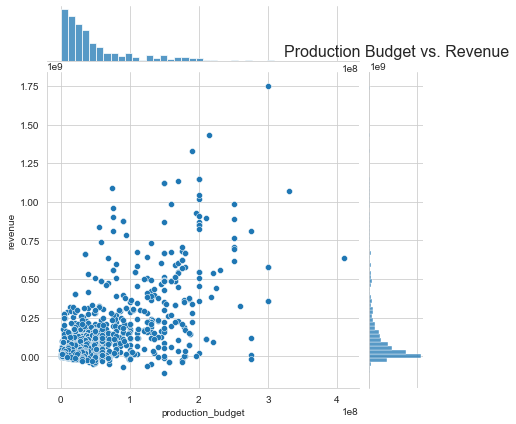

In [66]:
#plotting a joinplot
plt.figure(figsize=(8,10))
sns.jointplot(x='production_budget', y='revenue', data=merged_movies) 
plt.xlabel('Production Budget', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('Production Budget vs. Revenue', fontsize=16)
plt.grid(True)
plt.show()

In the above join plot, we can see the scatterplot that shows the relationship between the production budget and the revenue. Each point represents a single movies. The top and the right margins of the graph show histograms that generally show the distribution of the data for each variable. The dots are somewhat scattered meaning that there is moderate correlation between the production budget and revenue. There are also dots further away from the line meaning that there is presence of outliers. This means that even though there is a general trend (higher budgets can lead to higher revenue), there can also be more factors that affect the revenue such as big movie stars featuring in the movies or marketing strategies.

#### Popular genres
For this analysis, I used the rtmovie data to find the popular genres of the movies.
I started by finding the most popular genres and the number of times they appear in the rt movie dataset. In this case I only used the top 8 genres from the data

In [67]:
#finding the most popular genres and the frequency 
frequency = rt_movies['genre'].value_counts()

#viewing the first 8 popular genres
popular_genres = frequency.head(8)

print(popular_genres)

genre
Drama                                              112
Comedy                                              83
Comedy|Drama                                        64
Drama|Mystery and Suspense                          49
Art House and International|Drama                   31
Drama|Romance                                       27
Action and Adventure|Drama                          25
Action and Adventure|Drama|Mystery and Suspense     24
Name: count, dtype: int64


#### Movie popularity over the years
I started by extracting the years from the column release_date_x but first i converted the dates to datetime. I then grouped the movies by the year of release and popularity.This was important so as to compare the popularity of the movies over the years. Since i am using the average popularity of each group, I calculated the mean using the .mean() function

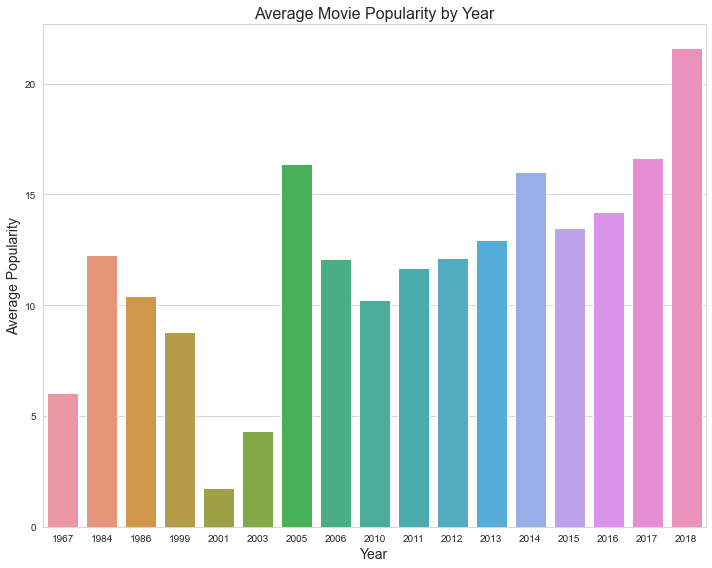

In [68]:
#extracting years from the release date column
merged_movies['year'] = pd.to_datetime(merged_movies['release_date_y']).dt.year

#grouping by year and calculating the average popularity
year_popularity = merged_movies.groupby('year')['popularity'].mean()

#creating a bar graph
plt.figure(figsize=(10,8))
sns.barplot(x=year_popularity.index, y=year_popularity.values)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.title('Average Movie Popularity by Year', fontsize=16)
plt.tight_layout() 
plt.show()

The bar graph above shows the average popularity of movies by year. The x-axis represents the years and the y-axis represents the average popularity. There is an overall slight upward trend in average movie popularity over the years. 2018 appears to be the year with the highest average popularity. There are some flactuations in the average movie popularity year by year. 
These results can also mean that there was a high number films produced in 2018 as compared to the other years.There is also a rise in revenue in 2015 and 2017 also supporting that more movies were released during this year.
The bar graph above shows the average popularity of movies by year.

### 2018 Movies Analysis
I analyzed the 2018 movies data to get some insight on what types of movies performed very well in that year gaining more popularity. I found the movies which had the most revenue in the year 2018.

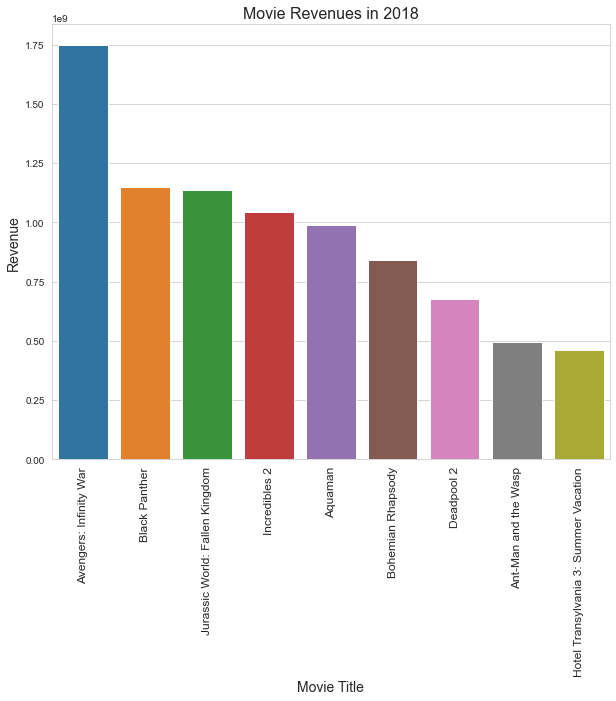

In [69]:
#filtering movies released in 2018
movies_2018 = merged_movies[merged_movies['release_date_y'].dt.year == 2018]
movies_2018 = movies_2018.sort_values(by='revenue', ascending=False)
top10_movies_2018 = movies_2018.head(10)

#retrieving the movie titles
movies_2018_titles = top10_movies_2018['title']

#extracting the revenue of movies in 2018
revenue_2018 = top10_movies_2018['revenue']

#plotting a bar graph
plt.figure(figsize=(10,8))
sns.barplot(x='title', y='revenue', data=top10_movies_2018)
sns.set_style('darkgrid')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Movie Title', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('Movie Revenues in 2018', fontsize=16)
plt.show()

This bar above plot can help derive what type of movies generally performed well and genereated a high revenue in the year 2018. Microsoft can consider releasing films similar to these movies as they performed well and returned the highest revenues.

In [70]:
#extracting months from the data
merged_movies['month'] = merged_movies['release_date_y'].dt.month 

ordered_months = ["january", "february", "march", "april", "may", "june", 
                   "july", "august", "september", "october", "november", "december"]

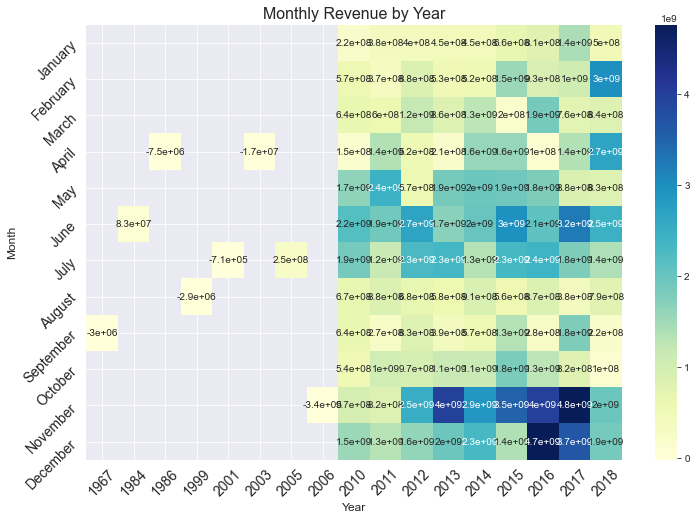

In [71]:
merged_movies['month'] = merged_movies['release_date_y'].dt.month

# Creating a pivot table for revenue by month and year
revenue_by_month_year = pd.pivot_table(merged_movies, values='revenue', index='month', columns='year', aggfunc='sum')

#Order the months
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]

# Updating the index to ordered month names
revenue_by_month_year.index = [ordered_months[i-1] for i in revenue_by_month_year.index]

# Create heatmap
plt.figure(figsize=(12, 8))  # Optional: adjust the figure size for better visualization
sns.heatmap(revenue_by_month_year, cmap="YlGnBu", annot=True)

# Customize the plot (optional)
plt.title("Monthly Revenue by Year", fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
sns.set_style('darkgrid')
plt.show()

From the heatmap we can see that the revenues are generally higher in the later years from 2016-2018 as compared to the earlier years because the darker colors appear to be concentrated in the later years. 
We can also see that the revenues are generally higher in months indicating seasonal trends. Across the years moderate revenue can be seen in the months of May, June and July. High revenue can be seen toward the end of the year in the months of November and December.
The heatmap shows how revenue has changed over the years.

## Revenue analysis

#### Distribution of Movie Revenues
In this part, I plotted a histogram to show the distribution of movie revenues in the merged_movies dataset.

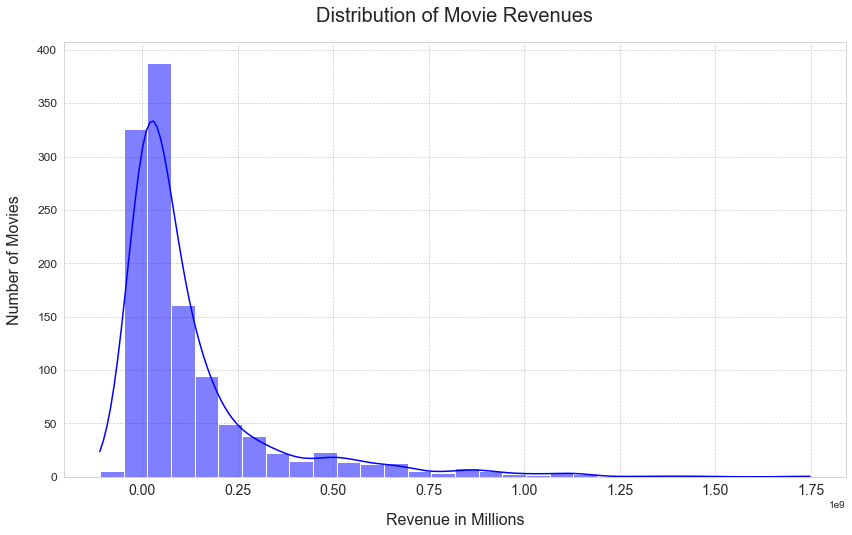

In [72]:
#plotting a histogram 

sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
sns.histplot(merged_movies['revenue'], bins=30, kde=True, color='blue')
plt.xlabel('Revenue in Millions', fontsize=16, labelpad=15)
plt.ylabel('Number of Movies', fontsize=16, labelpad=15)
plt.title('Distribution of Movie Revenues', fontsize=20, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()

The x-axis represents the movie revenue in millions and the y-axis represents the number of movies. We can observe that the histogram is right-skewed indicating that there are more movies with lower revenues and fewer movies with higher revenues. The tail of the histogram extends toward the right indicating that a few movies have revenues exceeding $1.5 million. Most movies lie on $0.25 million meaning thats the most frequent revenue. 
In conclusion, most movies have a revenue of less than $0.5 million with a smaller number of movies exceeding $1.5 million in revenues.

### Average revenues by month

In [73]:
monthly_revenue = merged_movies.groupby('month')['revenue'].sum()

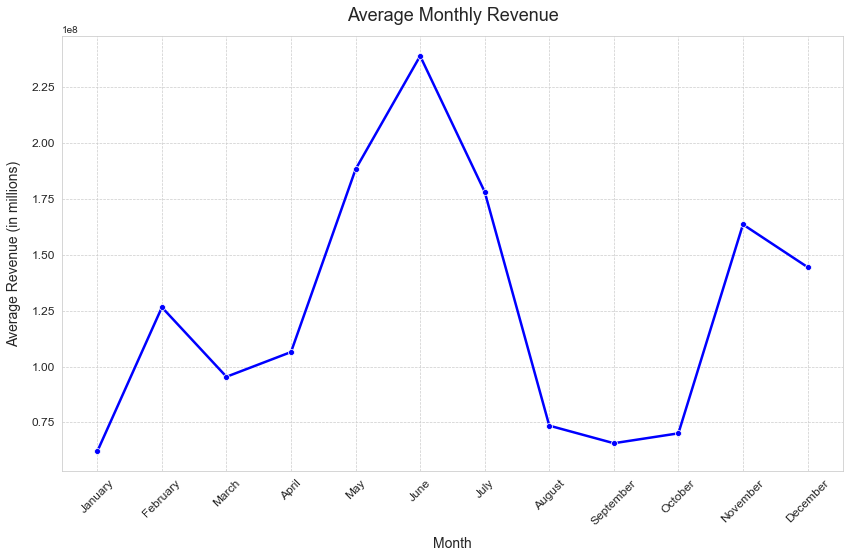

In [74]:
# Extract the month name
merged_movies['month'] = merged_movies['release_date_y'].dt.month

# Calculate average monthly revenue
monthly_revenue = merged_movies.groupby('month')['revenue'].mean()

# Order the months correctly
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
monthly_revenue.index = ordered_months

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', linewidth=2.5, color='b')
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Average Revenue (in millions)', fontsize=14, labelpad=10)
plt.title('Average Monthly Revenue', fontsize=18, pad=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()

The x axis shows the month and the y axis shows the average revenues for the months. From the plot we can see the seasonal trends in the data. There are peak seasons for movie releases.

### Monthly revenue by month
I created a bar graph to compare the total revenues across different months over the years

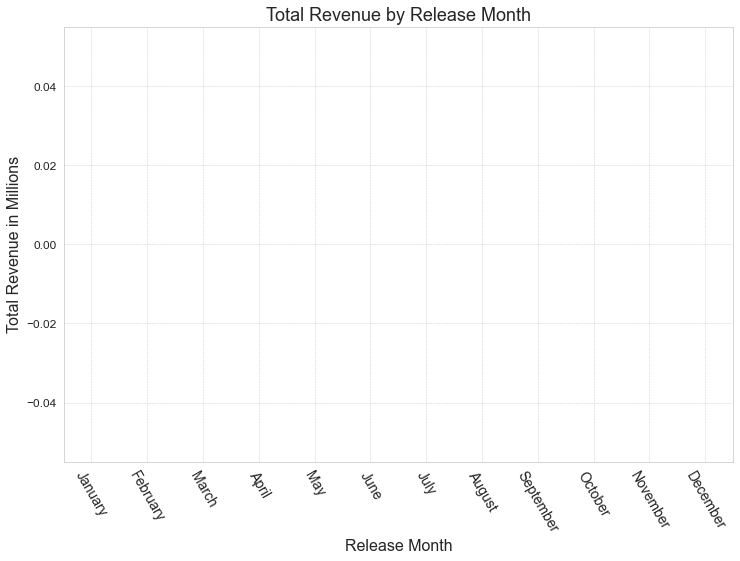

In [75]:
# Order the months correctly
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]

# Finding the monthly revenue and reindexing to ensure correct month order
monthly_revenue = merged_movies.groupby('month')['revenue'].sum().reindex(ordered_months)

# Plotting a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='bright')
plt.xticks(rotation=-60, fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Total Revenue in Millions', fontsize=16)
plt.xlabel('Release Month', fontsize=16)
plt.title('Total Revenue by Release Month', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The x-axis represents the release months  and the y-axis represents the total revenues. From the above bar graph, we can notice that there is a peak in monthly revenue over the years. This can help us derive seasonal changes across the graph. We notice that there is a peak in revenue between April and July and between November and December. However the peaks in revenue may indicate that relatively more movies were released in those months, making the revenue to be higher.

Text(0.5, 1.0, 'Revenue Distributions across Months')

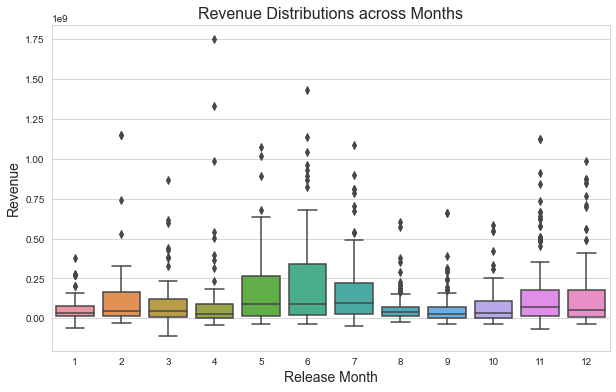

In [76]:
# Extract the month name
merged_movies['month'] = merged_movies['release_date_y'].dt.month

# Order the months correctly
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]
monthly_revenue.index = ordered_months

plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='revenue', data=merged_movies)
plt.xlabel('Release Month', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('Revenue Distributions across Months', fontsize=16)

In the box plot above, the horizontal line in the middle of the box is the median revenue. The box contains the middle (50th quartile) of the data, 75th quartile at the upper edge and 25th quartile at the lower edge.
The whiskers extend to the minimum and maximum values of the data, excluding outliers. 
The outliers are represented by the dots outside the whiskers. The box plot shows that the median revenue is around 100 million dollars. The 25th quartile is around 50 million dollars and the 75th quartile is around 150 million dollars.
The box plot also shows that there are a few outliers with revenue above 300 million dollars.
Overall the box plot shows that there is a seasonal component in the revenues therefore, showing a trend.